<a href="https://colab.research.google.com/github/anderrow/DataScience/blob/master/AIRBNB_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

He decidido utilizar el mismo dataframe que nos proporcionasteis de AIRBNB por que me pareció interesante en su momento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder() #Instantiating the encoder
s_sc = StandardScaler()

path = '/content/drive/MyDrive/1. Software/Machine Learning/airbn_data.csv'

df = pd.read_csv(path)

# Data visualisation and cleansing



* Dirías que este Dataset está limpio? Se puede usar para entrenar un modelo?

* En caso que no, ¿qué técnicas de Data Cleaning necesita?

* ¿Borrarías alguna columna?

* ¿Cuál es nuestro target variable?

* Qué columnas necesitan Encoding? Y Scaling? ¡Aplica estas técnicas donde sea necesario!


---

1.  El dataset no está limpio, se podrá utilizar para entrenar un modelo correctamente una vez sea depurado y sus datos normalizados.
2. Manejo de valores inexistententes (NaN values),
  Identificación y correción de Errores,
  Transformación de datos (variables categóricas)
  Eliminación de Outliers,
  Normalización y Estandarización
3. Sí, todas las que no tengan relevancia para deducir el precio, así como el name, el id, el host_id y el host_name. Hay otras columnas que podrían tener relevancia (latitude,longitude) si medimos, por ejemplo, que tan cerca están del centro, una estación de metro o otro tipo de casuisticas, pero creo que por si solas carecen de relevancia así que también las he eliminado.
4. price
5. Encoding es necesario para las columnas: neighbourhood_group, neighbourhood.
 Scaling será aplicado a todas las columnas para que tengan una escala común y ninguna sea tomada en más consideración que otra.






In [ ]:
df.sample(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8625,6635179,Home in Lower East Side,3173147,Andrea,Manhattan,Lower East Side,40.71968,-73.98708,Entire home/apt,250,3,68,2019-06-08,1.36,2,166


In [ ]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'latitude',
                      'last_review', 'longitude']) #Drop irrelevant columns

## Managing NaN Values

In [ ]:
df.isnull().any() #Check if there are any Nan values

,0
neighbourhood_group,False
neighbourhood,False
room_type,False
price,False
minimum_nights,False
number_of_reviews,False
reviews_per_month,True
calculated_host_listings_count,False
availability_365,False


In [ ]:
#Si reviews_per_month = Nan sustituimos por 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df['reviews_per_month'].isnull().any()

False

## Identifying and fixing errors

In [ ]:
df.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,4,188


In [ ]:
df = df[df['availability_365'] != 0] #If an apartment is available 0 days is irrelevant.

In [ ]:
(df['availability_365'] == 0).any()

False

## Data transformation

### Encoding

In [ ]:
# Transform the categorical variable into numbers
df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
df['room_type'] = le.fit_transform(df['room_type'])

In [ ]:
print(f"{df['neighbourhood_group'].unique()} \n{sorted(df['neighbourhood'].unique())}\n{df['room_type'].unique()}") #Ensure

[1 2 3 4 0] 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217]
[1 0 2

In [ ]:
df[df < 0].any() #Check for negative values

,0
neighbourhood_group,False
neighbourhood,False
room_type,False
price,False
minimum_nights,False
number_of_reviews,False
reviews_per_month,False
calculated_host_listings_count,False
availability_365,False


### Outliers removal

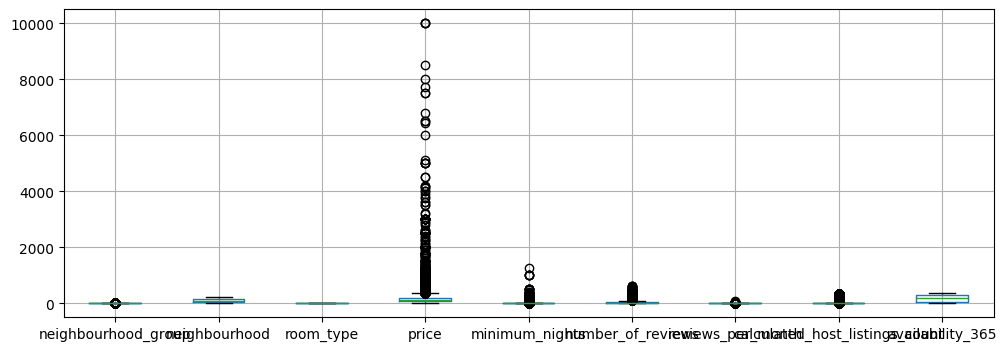

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))  # Create a figure and axes with specific size
df.boxplot(ax=ax)  # Pass the axes to the boxplot function
plt.show()

In [ ]:
len(df[df['availability_365'] > 365]) #ain't gonna be more than 365 days per year. Ensure

0

In [ ]:
columns_to_filter = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'reviews_per_month']

In [ ]:
print (f'Original length: {len(df)} \n')
for column in columns_to_filter:
  #Calculate Q1, Q3 and IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  #Define limits
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  df =  df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
  print(f'After removing outliers from {column} the new lenght is {len(df)} \n')

Original length: 31362 

After removing outliers from price the new lenght is 29501 

After removing outliers from minimum_nights the new lenght is 24153 

After removing outliers from number_of_reviews the new lenght is 22147 

After removing outliers from reviews_per_month the new lenght is 21456 

After removing outliers from reviews_per_month the new lenght is 21260 



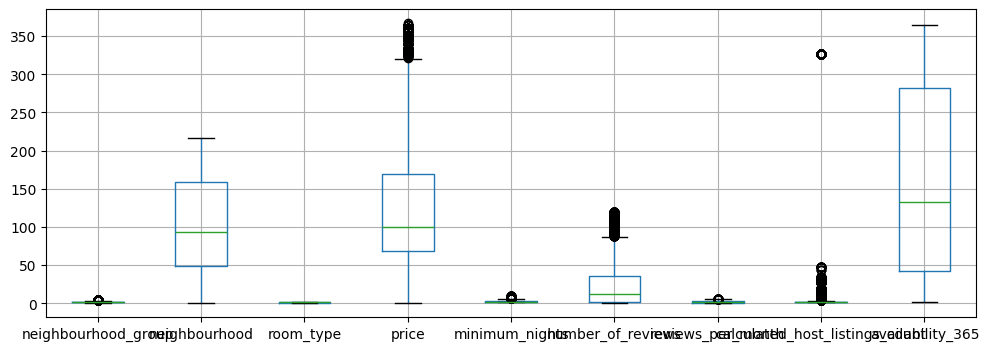

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))  # Create a figure and axes with specific size
df.boxplot(ax=ax)  # Pass the axes to the boxplot function
plt.show()

### Scaling

In [ ]:
s_sc.fit(df)

StandardScaler()

In [ ]:
df_scaled  = s_sc.transform(df) #checkear, creo que todavía no es un df

In [ ]:
type(df_scaled)

numpy.ndarray

In [ ]:
df[:] = df_scaled

<ipython-input-53-437c339b6f81>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.83281265  0.38139644  0.38139644 ... -0.83281265  0.38139644
  0.38139644]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = df_scaled
<ipython-input-53-437c339b6f81>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.10320691  0.38555213 -0.10483693 ... -1.08561505 -0.08997666
 -0.08997666]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = df_scaled
<ipython-input-53-437c339b6f81>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.78658602 -1.01117992  0.78658602 ...  0.78658602  2.58435196
  0.78658602]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


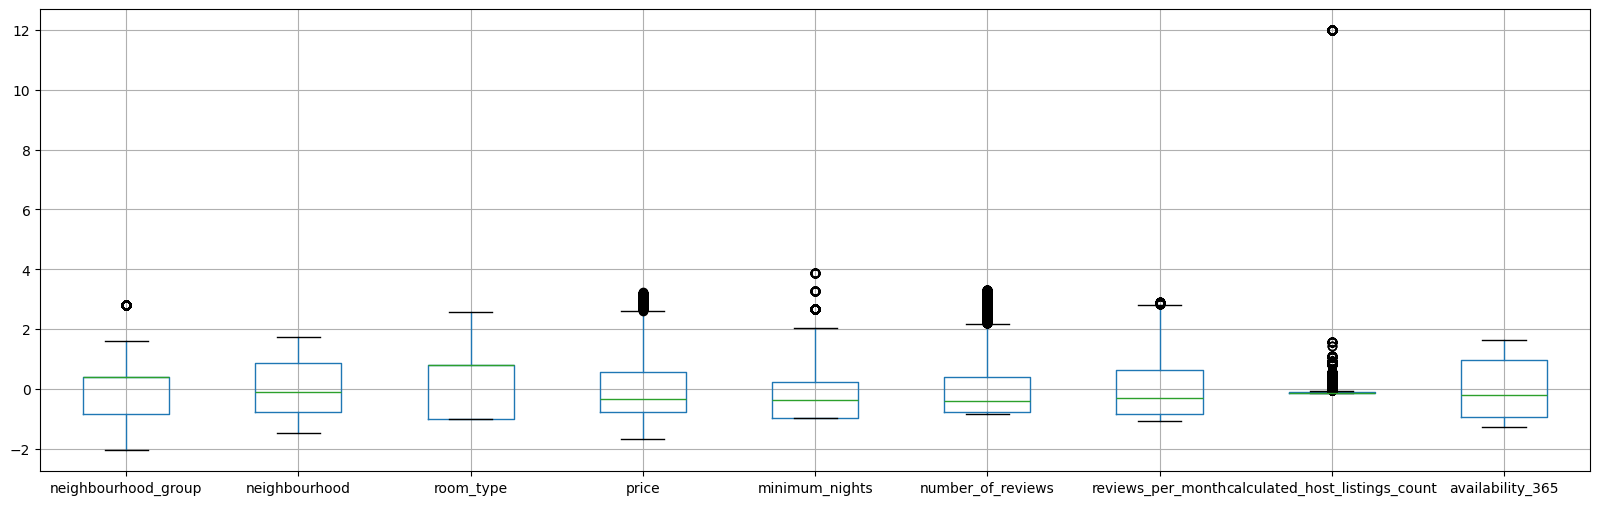

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))  # Create a figure and axes with specific size
df.boxplot(ax=ax)  # Pass the axes to the boxplot function
plt.show()